<a href="https://colab.research.google.com/github/lunacat16/Sutton-RL-code/blob/main/ten_armed_bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
class Bandit:
    def __init__(self, k_arm=10, epsilon=0.01):
        self.k = k_arm
        self.epsilon = epsilon
        self.sigma = 1.

    def reset(self):
        self.q_true = np.random.randn(self.k)
        self.q_distribution = []
        for i in range(self.k):
            self.q_distribution.append(np.random.normal(self.q_true[i], self.sigma, 2000))
        self.q_estimation = np.zeros(self.k)
        self.action_count = np.zeros(self.k)
        self.best_action = np.argmax(self.q_true)
        self.time_step = 0
        self.indices = np.arange(self.k)
        self.total_reward = 0
        self.average_reward = []

    def act(self, choice_num = 1000):
        for i in range(choice_num):
            if np.random.rand() < self.epsilon:
                choice = np.random.choice(self.indices)
                reward = random.choice(self.q_distribution[choice])
            else:
                choice = np.argmax(self.q_estimation)
                reward = random.choice(self.q_distribution[choice])
            self.time_step += 1
            self.q_estimation[choice] *= self.action_count[choice]
            self.action_count[choice] += 1
            self.q_estimation[choice] = (self.q_estimation[choice] + reward)/self.action_count[choice]
            self.total_reward += reward
            self.average_reward.append(self.total_reward/self.time_step)

    def dist_plot(self):
        fig, ax = plt.subplots(figsize=(12,10))
        violin = ax.violinplot([self.q_distribution[i] for i in range(self.k)],\
                               positions= [j for j in range(self.k)])
        plt.grid()
        plt.show()

    def show_info(self):
        print("true q: ", self.q_true)
        print("estimated q: ", self.q_estimation)
        print("real optimal choice: ", np.argmax(self.q_true))
        print("real optimal choice mean: ", self.q_true[self.best_action])
        print("average reward: ", self.average_reward[-1])
        print("optimal choice percentage: ", self.action_count[self.best_action]/self.time_step)
        plt.figure(figsize=(12,6))
        plt.grid()
        plt.plot(self.average_reward)

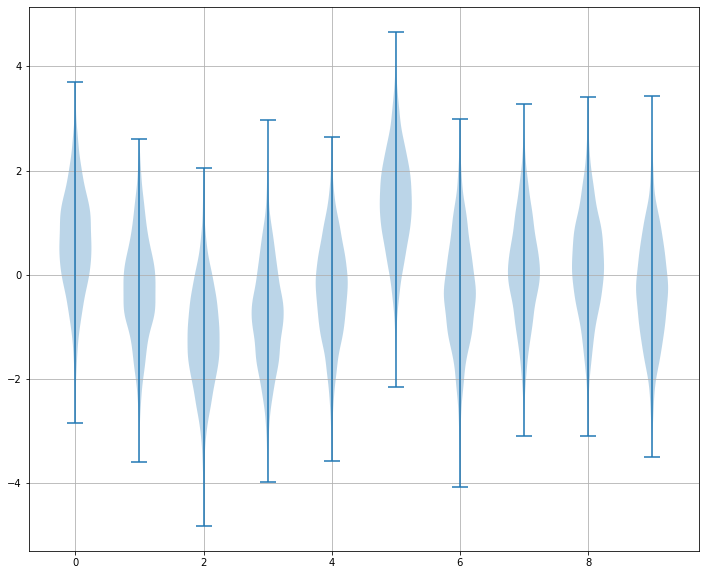

true q:  [ 0.61817547 -0.23351509 -1.19319744 -0.72558064 -0.32520089  1.37205504
 -0.26802104  0.04532851  0.17404838 -0.31238905]
estimated q:  [ 0.62652378  0.47869081  0.39898848  0.          0.          1.34223146
 -0.92203238  0.         -0.82720911  0.014982  ]
real optimal choice:  5
real optimal choice mean:  1.3720550365262865
average reward:  0.686807671085102
optimal choice percentage:  0.093


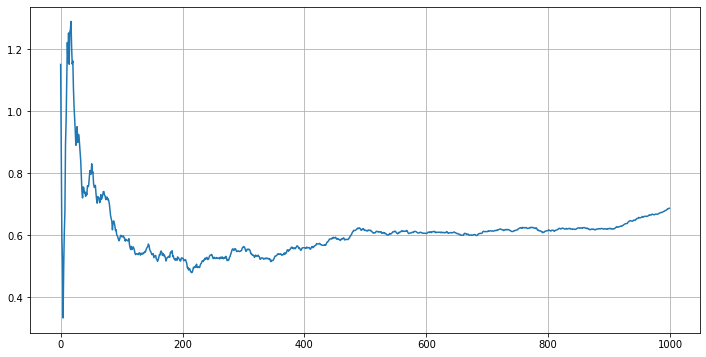

In [3]:
bandit = Bandit()
bandit.reset()
bandit.dist_plot()
bandit.act()
bandit.show_info()